<a href="https://colab.research.google.com/github/haronghatong/private_project/blob/main/%EB%B9%85%EB%B6%84_%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [ ]:
# 한글 폰트 설치 (Nanum Gothic)
!apt-get -qq -y install fonts-nanum

# 한글 폰트 확인
import matplotlib.font_manager as fm
# Call the public method to update the font cache
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf') # This assumes NanumGothic.ttf is the font file name. You might need to adjust the path.

# 설치된 폰트 확인
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
NanumGothic


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 경기도대기환경정보일평균자료.csv to 경기도대기환경정보일평균자료.csv


In [ ]:
import pandas as pd

# 인코딩을 지정하여 파일 읽기
df = pd.read_csv('경기도대기환경정보일평균자료.csv', encoding='cp949')

# 데이터 확인
print(df.head())

   도시명 측정장소명      측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
0  수원시   인계동  20230128          37.0          13.0
1  수원시   인계동  20230129          46.0          16.0
2  수원시   인계동  20230130          44.0          18.0
3  수원시   인계동  20230131          38.0          16.0
4  수원시   인계동  20230201          63.0          30.0


# 데이터 전처리

In [ ]:
import pandas as pd

# 측정일자를 datetime 형식으로 변환
df['측정일자'] = pd.to_datetime(df['측정일자'], format='%Y%m%d')

# 변환된 데이터 확인
print(df.head())


   도시명 측정장소명       측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
0  수원시   인계동 2023-01-28          37.0          13.0
1  수원시   인계동 2023-01-29          46.0          16.0
2  수원시   인계동 2023-01-30          44.0          18.0
3  수원시   인계동 2023-01-31          38.0          16.0
4  수원시   인계동 2023-02-01          63.0          30.0


In [ ]:
# 평균으로 대체
df['PM10측정값(㎍/㎥)'].fillna(df['PM10측정값(㎍/㎥)'].mean(), inplace=True)

# 중앙값으로 대체
df['PM25측정값(㎍/㎥)'].fillna(df['PM25측정값(㎍/㎥)'].median(), inplace=True)

# 지정된 값으로 대체
df.fillna(0, inplace=True)


<ipython-input-25-b61fda912da5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10측정값(㎍/㎥)'].fillna(df['PM10측정값(㎍/㎥)'].mean(), inplace=True)
<ipython-input-25-b61fda912da5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df.isnull().sum()

,0
도시명,0
측정장소명,0
측정일자,0
PM10측정값(㎍/㎥),0
PM25측정값(㎍/㎥),0


In [ ]:
# 데이터 타입 확인
print(df.dtypes)

# 변환 예시: 수치형으로 변환
df['PM10측정값(㎍/㎥)'] = pd.to_numeric(df['PM10측정값(㎍/㎥)'], errors='coerce')
df['PM25측정값(㎍/㎥)'] = pd.to_numeric(df['PM25측정값(㎍/㎥)'], errors='coerce')

도시명                     object
측정장소명                   object
측정일자            datetime64[ns]
PM10측정값(㎍/㎥)           float64
PM25측정값(㎍/㎥)           float64
dtype: object


In [ ]:
df.head()

,도시명,측정장소명,측정일자,PM10측정값(㎍/㎥),PM25측정값(㎍/㎥)
0,수원시,인계동,2023-01-28,37.0,13.0
1,수원시,인계동,2023-01-29,46.0,16.0
2,수원시,인계동,2023-01-30,44.0,18.0
3,수원시,인계동,2023-01-31,38.0,16.0
4,수원시,인계동,2023-02-01,63.0,30.0


# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
suwon_data = df[df['도시명'] == '수원시'].copy()
suwon_data = suwon_data.sort_values(by=['측정장소명', '측정일자'])

# 이상치 제거 예제 (IQR 사용)
Q1 = suwon_data['PM10측정값(㎍/㎥)'].quantile(0.25)
Q3 = suwon_data['PM10측정값(㎍/㎥)'].quantile(0.75)
IQR = Q3 - Q1
suwon_data = suwon_data[(suwon_data['PM10측정값(㎍/㎥)'] >= Q1 - 1.5 * IQR) &
                        (suwon_data['PM10측정값(㎍/㎥)'] <= Q3 + 1.5 * IQR)]


In [ ]:
suwon_data = df[df['도시명'] == '수원시'].copy()
suwon_data = suwon_data.sort_values(by=['측정장소명', '측정일자'])

# 이상치 제거 예제 (IQR 사용)
Q2 = suwon_data['PM25측정값(㎍/㎥)'].quantile(0.25)
Q4 = suwon_data['PM25측정값(㎍/㎥)'].quantile(0.75)
IQR = Q4 - Q2
suwon_data = suwon_data[(suwon_data['PM25측정값(㎍/㎥)'] >= Q2 - 1.5 * IQR) &
                        (suwon_data['PM25측정값(㎍/㎥)'] <= Q4 + 1.5 * IQR)]


In [ ]:
suwon_data.head()

,도시명,측정장소명,측정일자,PM10측정값(㎍/㎥),PM25측정값(㎍/㎥)
2885,수원시,경수대로,2023-01-02,30.0,13.0
2886,수원시,경수대로,2023-01-03,35.0,20.0
2887,수원시,경수대로,2023-01-04,40.0,25.0
2888,수원시,경수대로,2023-01-05,59.0,41.0
2892,수원시,경수대로,2023-01-09,97.0,38.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 대상 열
columns_to_scale = ['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']

# 스케일러 초기화
scaler = MinMaxScaler(feature_range=(0, 1))

# 스케일링 수행
scaled_values = scaler.fit_transform(suwon_data[columns_to_scale])

# 스케일링된 값을 원본 데이터프레임에 다시 삽입
suwon_data[columns_to_scale] = scaled_values

# 결과 확인
print(suwon_data.head())


      도시명 측정장소명       측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
2885  수원시  경수대로 2023-01-02      0.090909      0.276596
2886  수원시  경수대로 2023-01-03      0.107143      0.425532
2887  수원시  경수대로 2023-01-04      0.123377      0.531915
2888  수원시  경수대로 2023-01-05      0.185065      0.872340
2892  수원시  경수대로 2023-01-09      0.308442      0.808511


# 학습&평가 LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


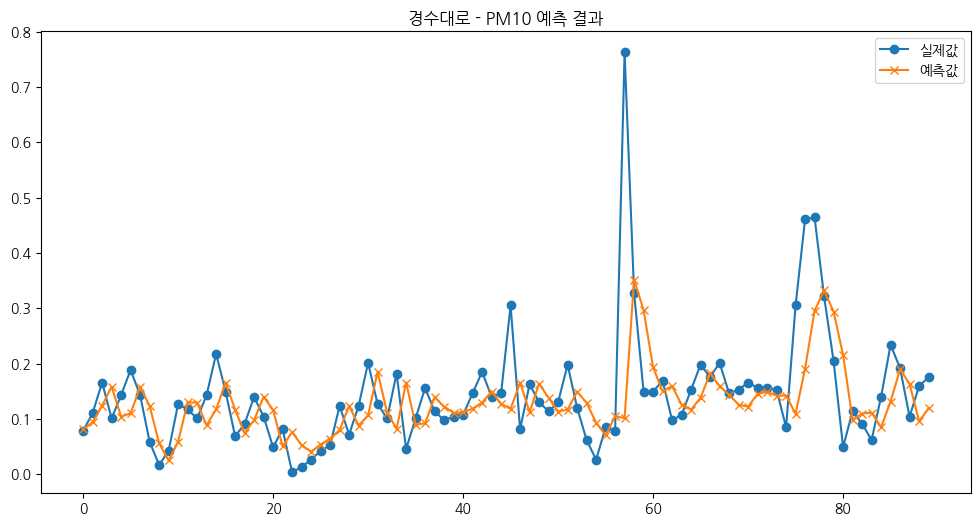

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


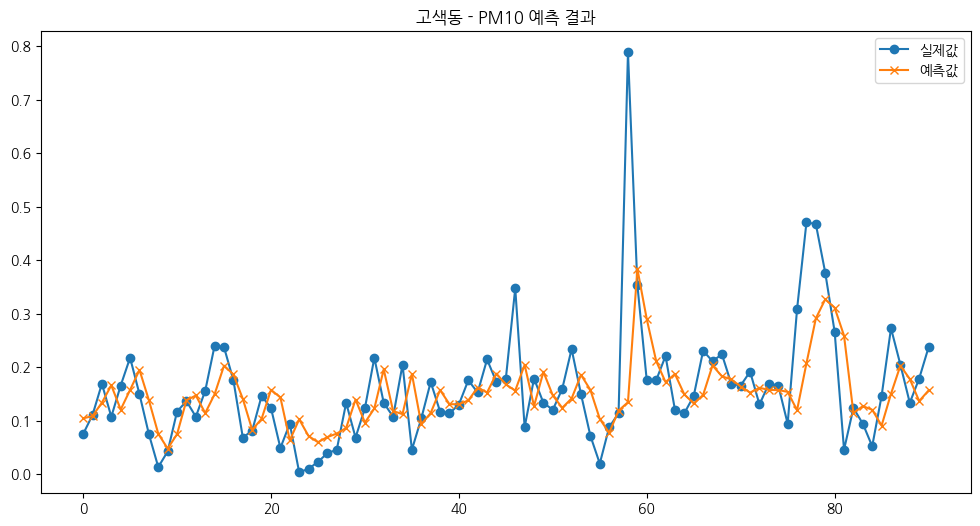

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


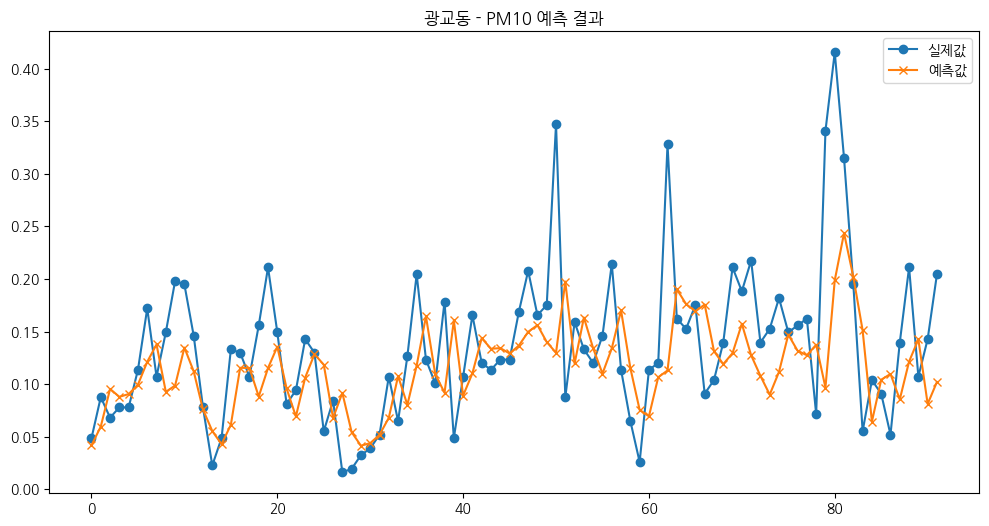

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


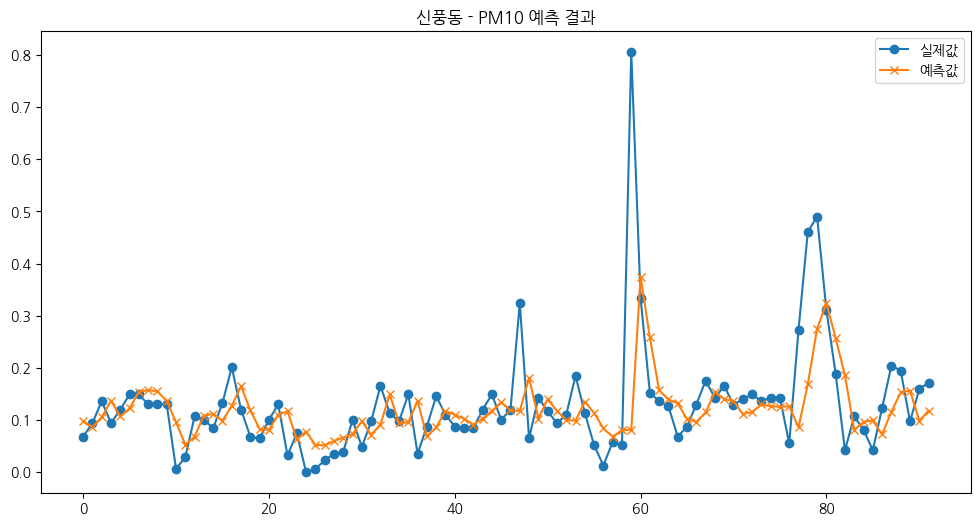

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


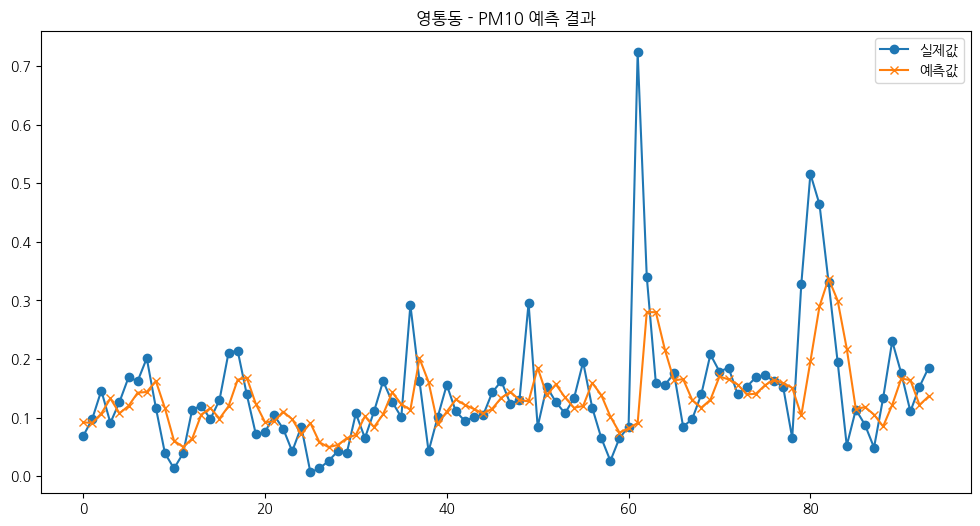

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step


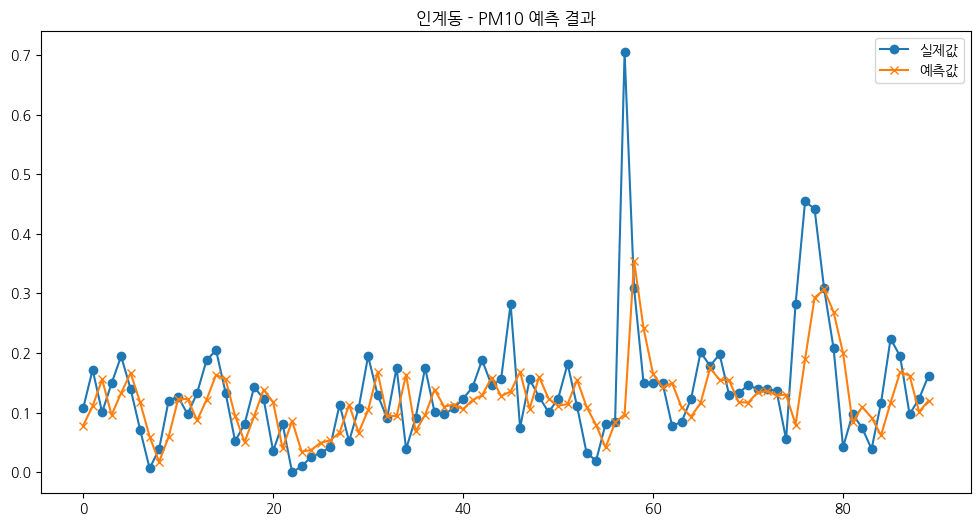

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


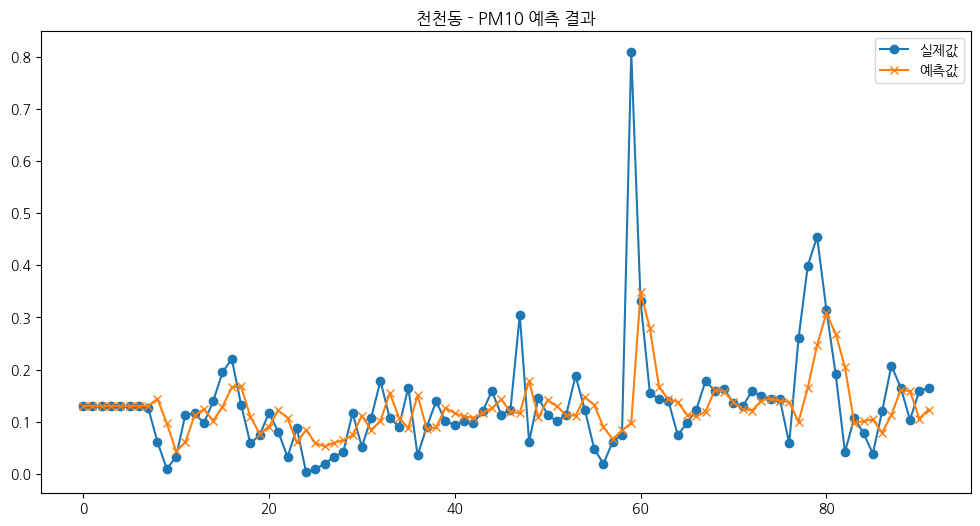

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


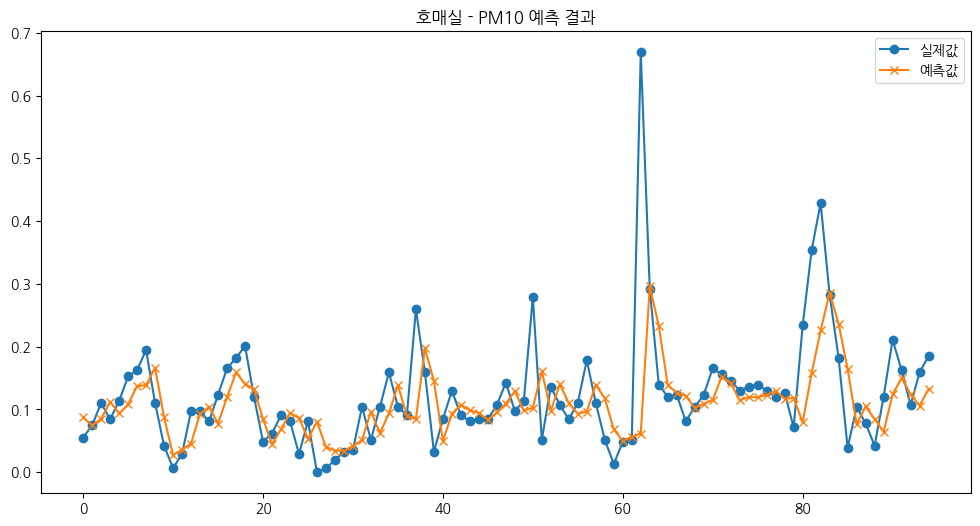

  측정장소명  PM10_RMSE
0  경수대로   0.097548
1   고색동   0.099552
2   광교동   0.067779
3   신풍동   0.100434
4   영통동   0.096034
5   인계동   0.091414
6   천천동   0.097640
7   호매실   0.085355


In [ ]:


# 결과 저장용 리스트
results = []

# 각 측정 장소별로 LSTM 적용
for location in suwon_data['측정장소명'].unique():
    # 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location].copy()
    location_data.set_index('측정일자', inplace=True)

    # 필요한 열만 선택
    dataset = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 데이터 정규화
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset_scaled = scaler.fit_transform(dataset)

    # 시계열 데이터 생성
    def create_sequences(data, seq_length=3):
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i, 0])  # PM10 예측
        return np.array(X), np.array(y)

    seq_length = 3  # 과거 3일 데이터를 기반으로 예측
    X, y = create_sequences(dataset_scaled, seq_length)

    # 훈련 및 테스트 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # LSTM 모델 정의
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # 예측
    y_pred = model.predict(X_test)

    # 역정규화
    y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))
    y_pred_rescaled = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], 1)))))

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_test_rescaled[:, 0], y_pred_rescaled[:, 0]))
    results.append({'측정장소명': location, 'PM10_RMSE': rmse})

    # 시각화 (선택 사항)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled[:, 0], label='실제값', marker='o')
    plt.plot(y_pred_rescaled[:, 0], label='예측값', marker='x')
    plt.title(f'{location} - PM10 예측 결과')
    plt.legend()
    plt.show()

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

# 예측

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


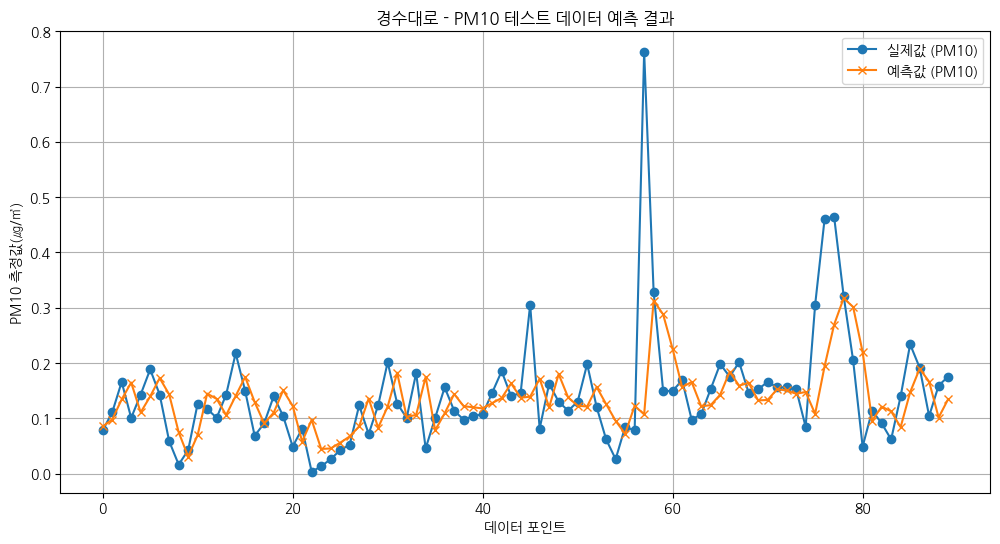

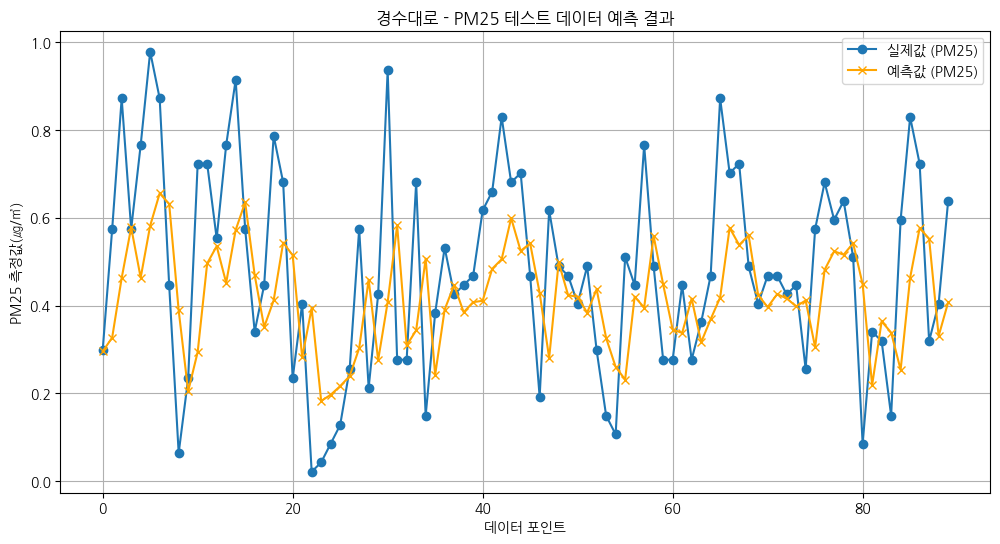

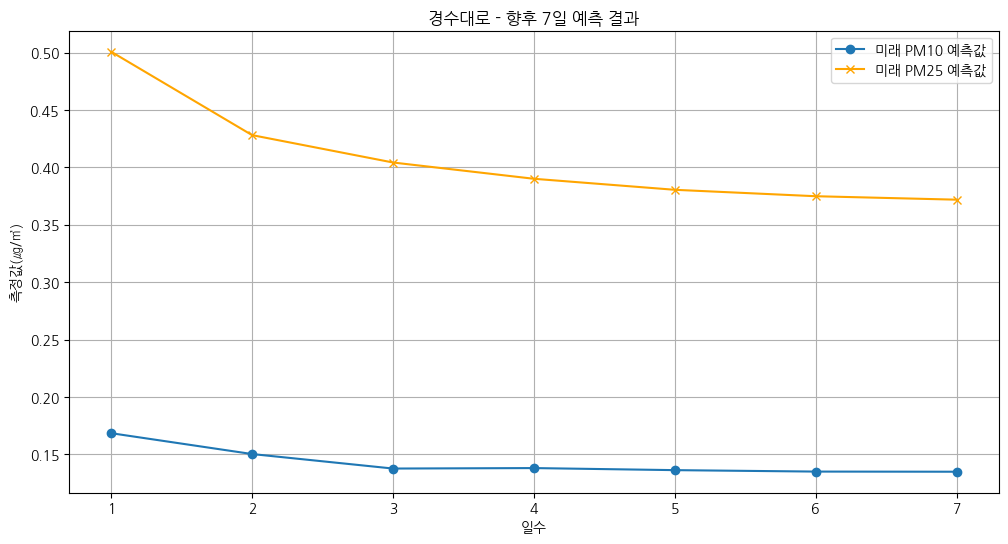

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


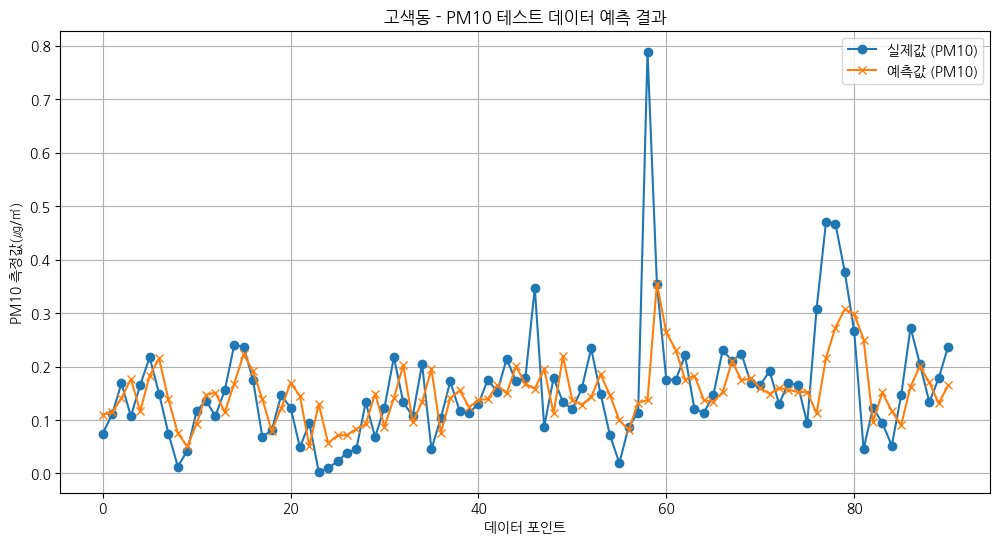

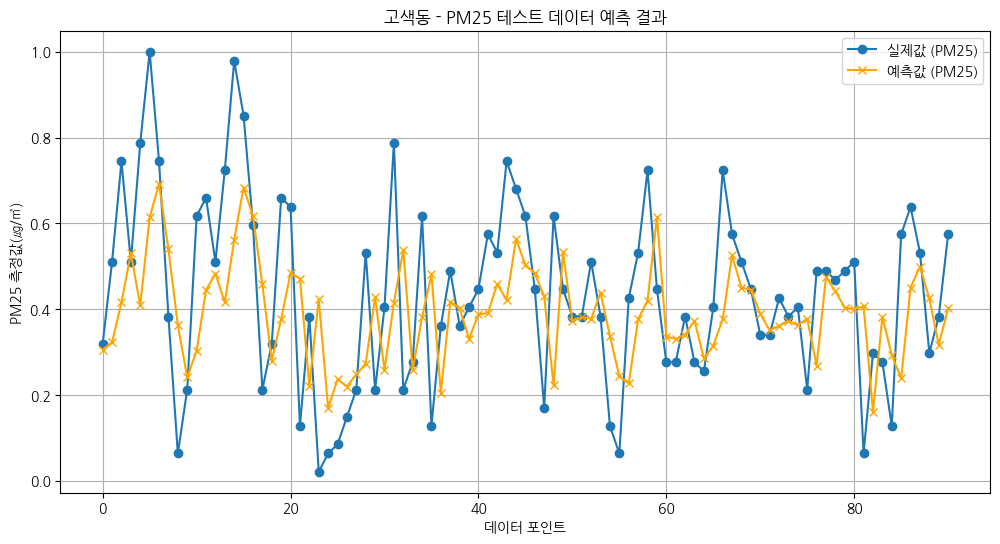

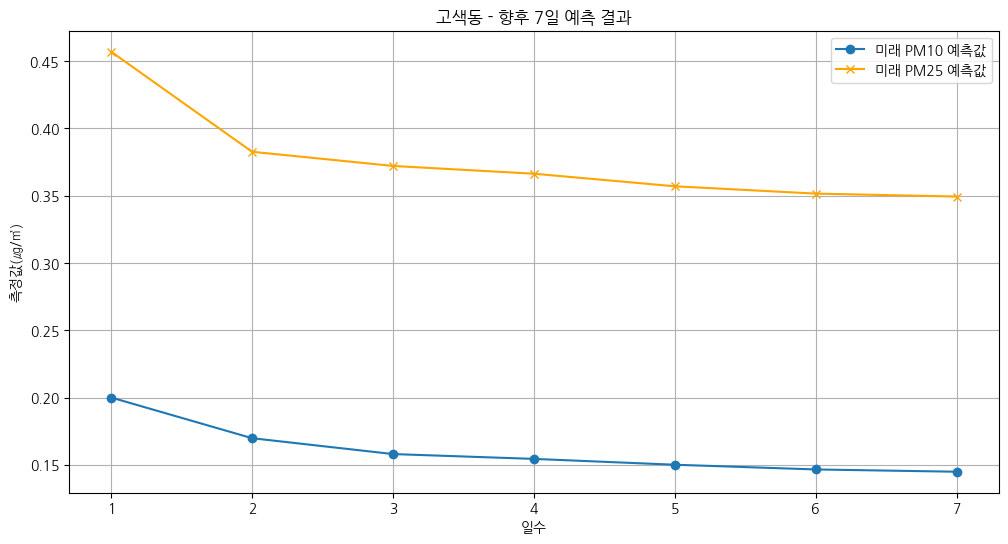

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


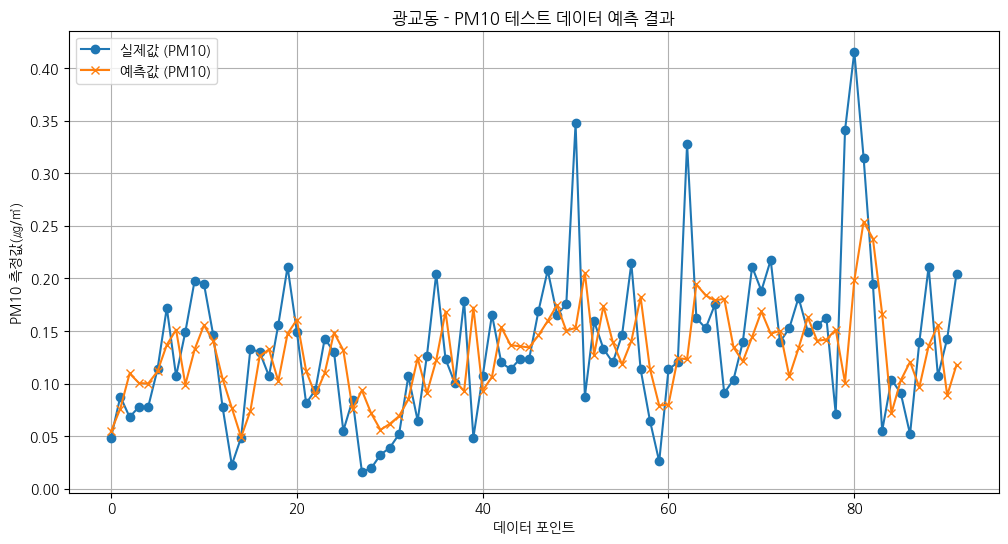

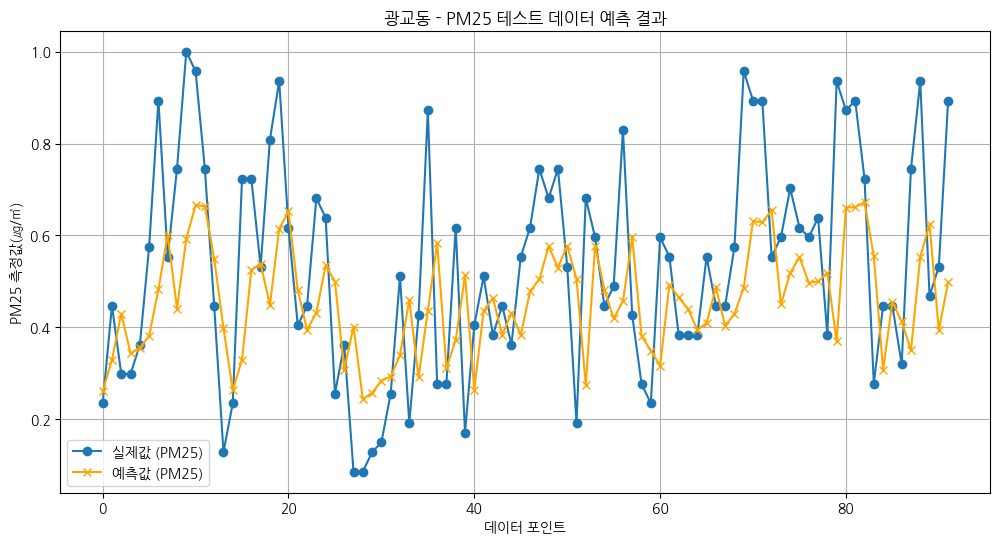

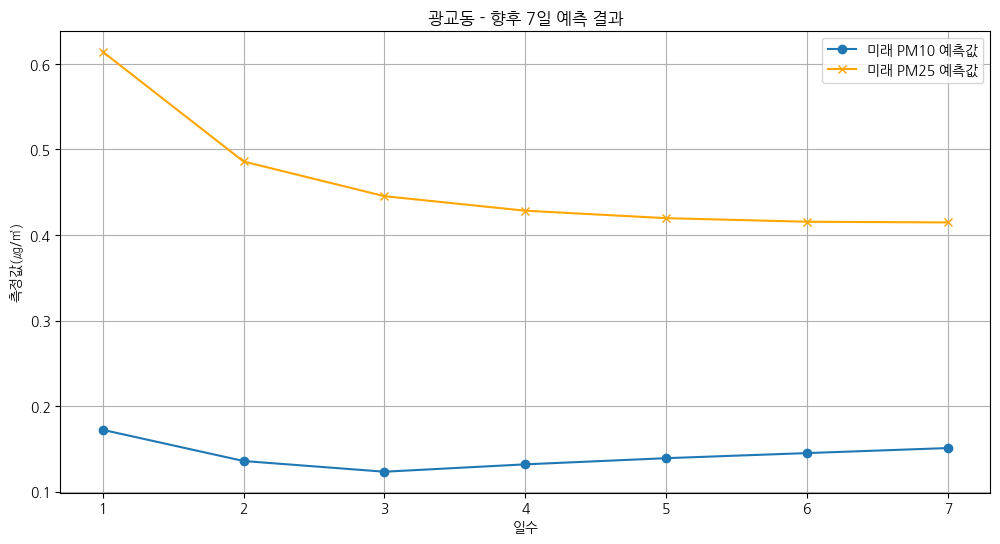

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


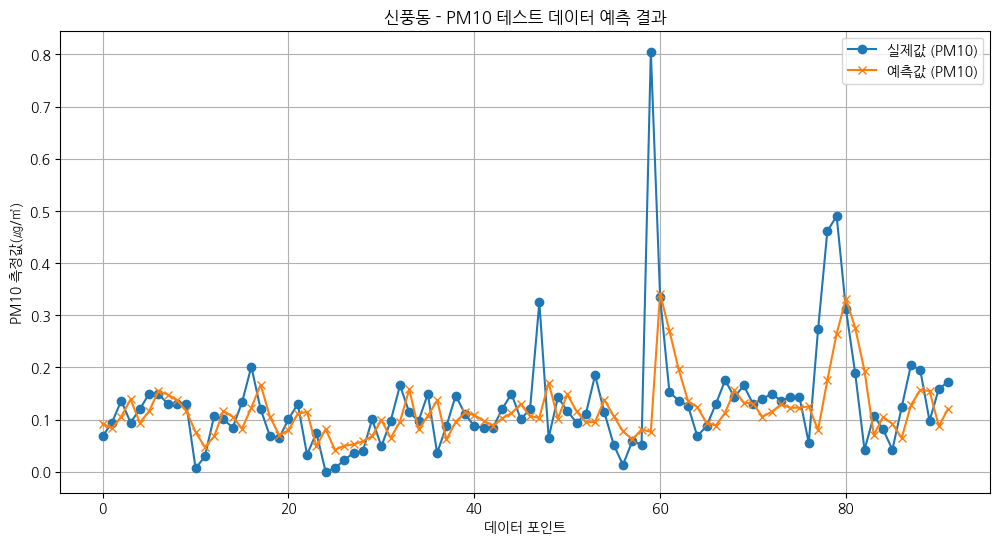

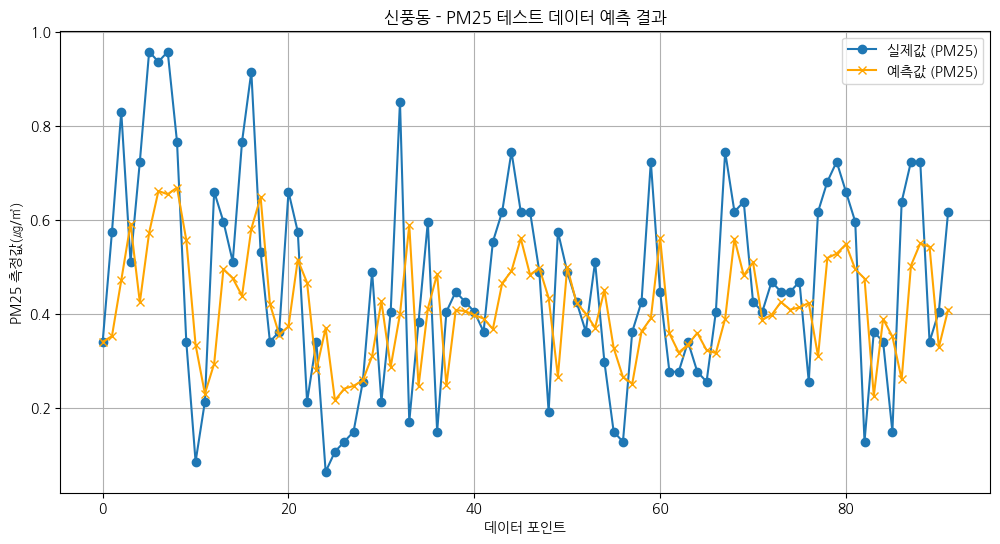

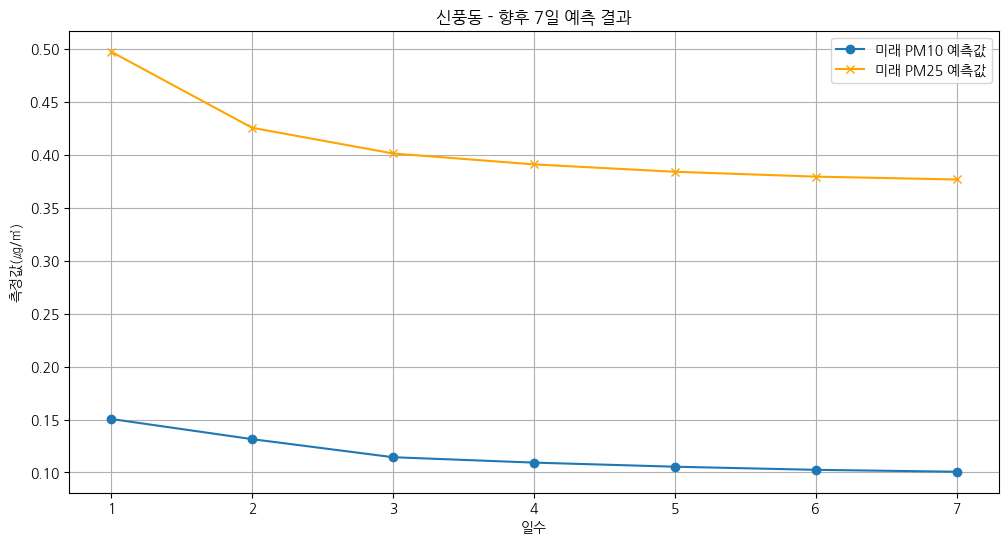

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


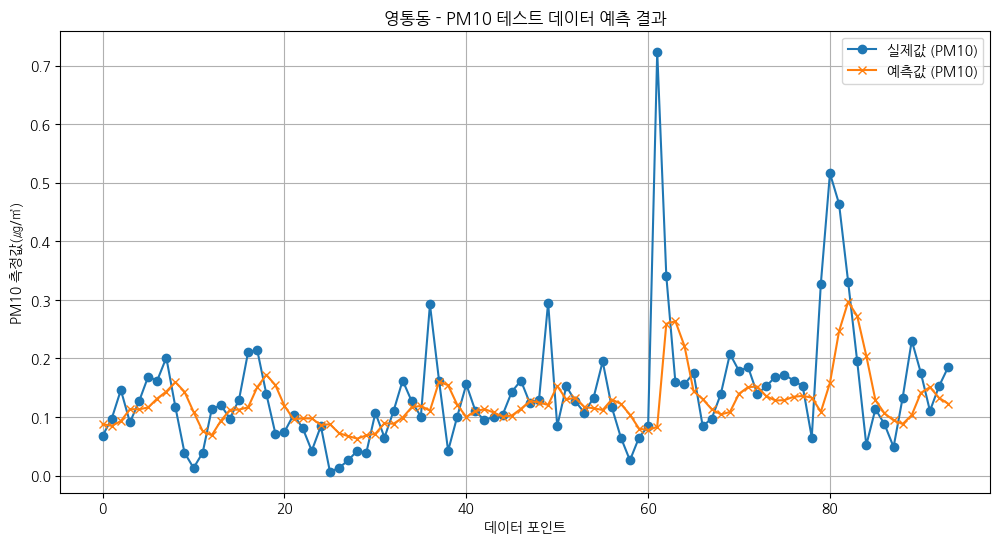

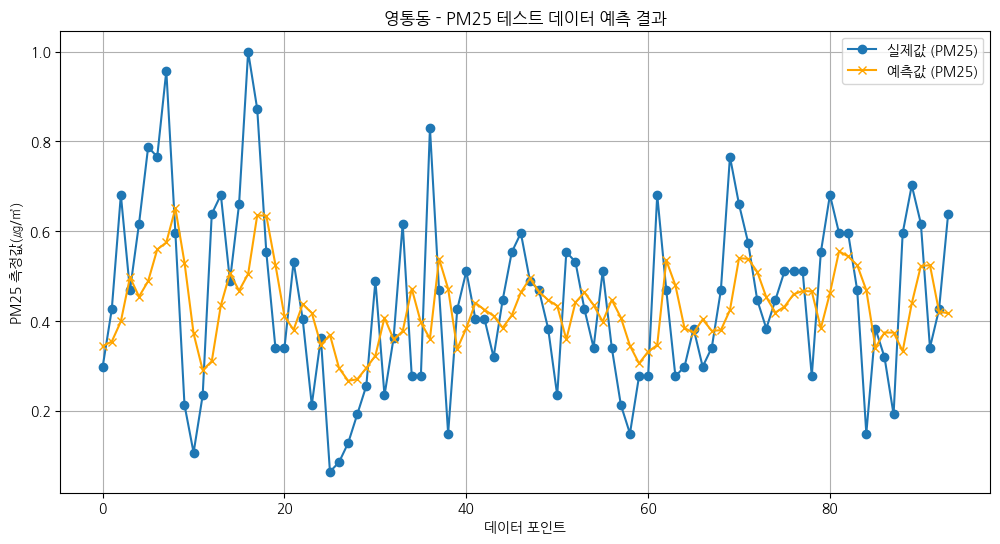

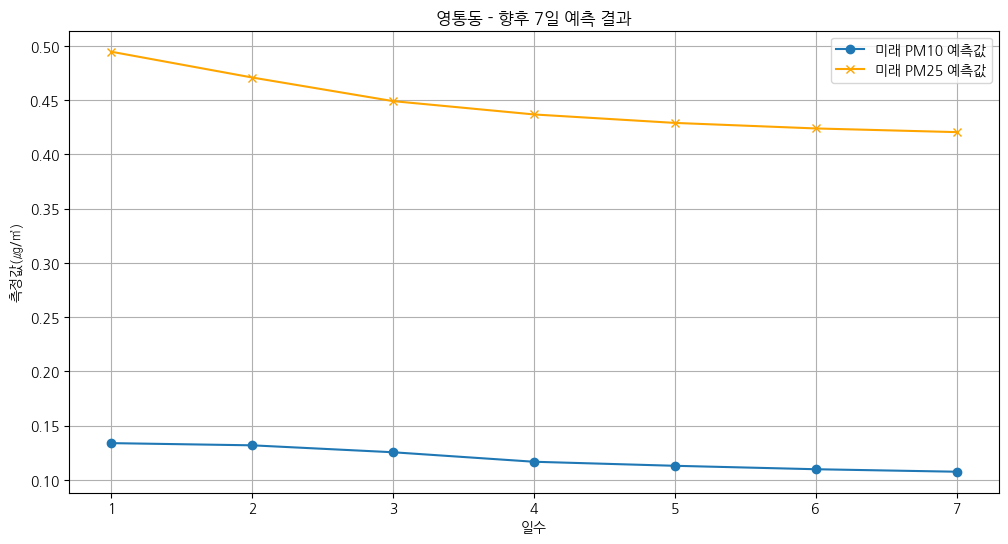

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


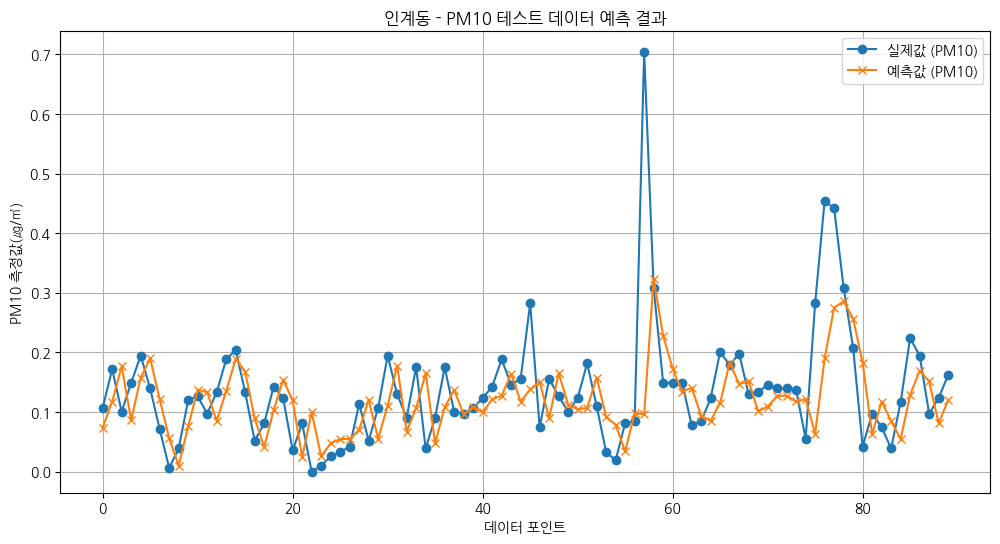

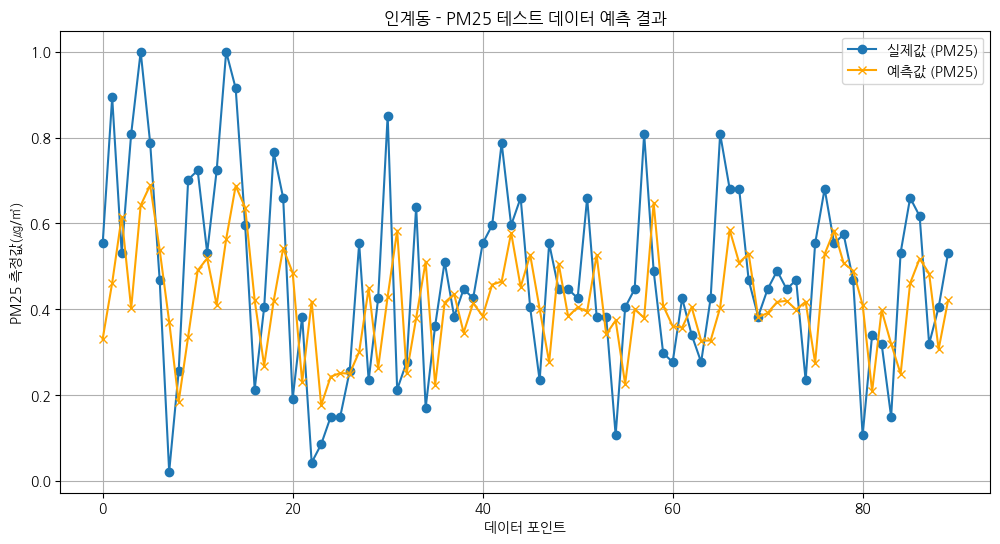

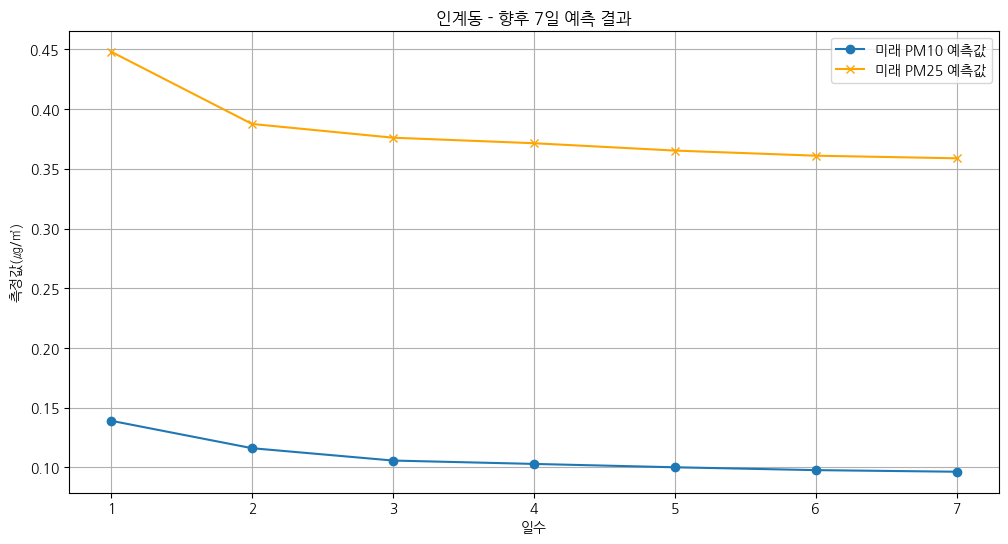

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


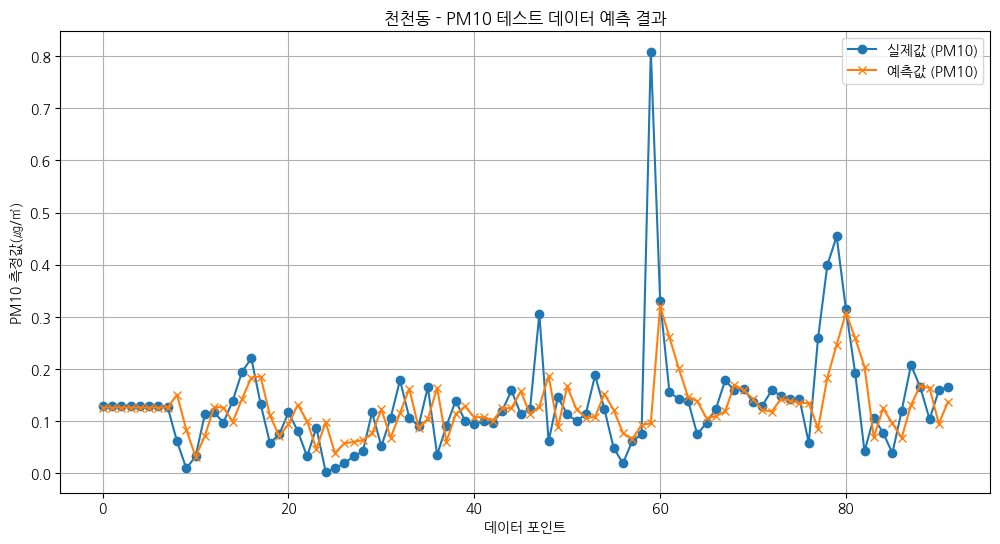

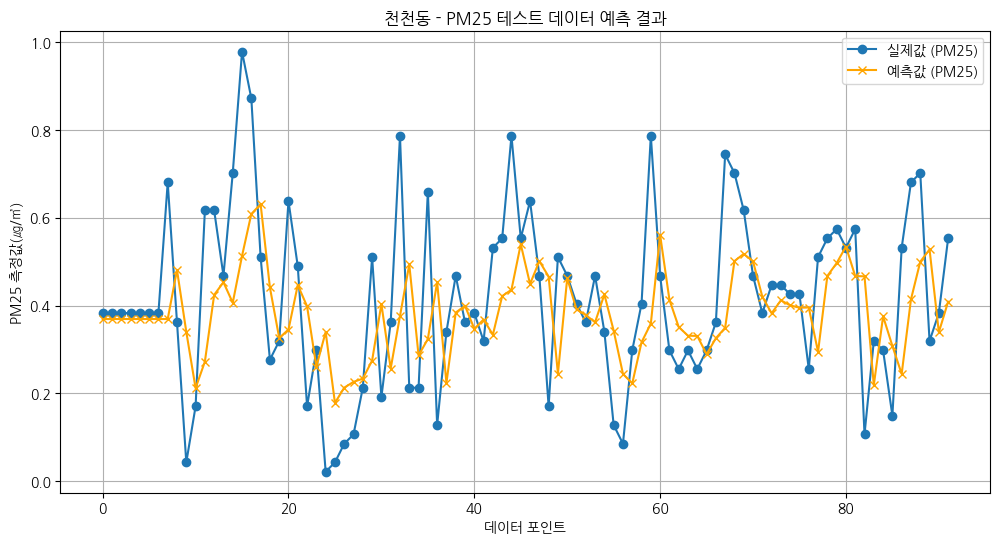

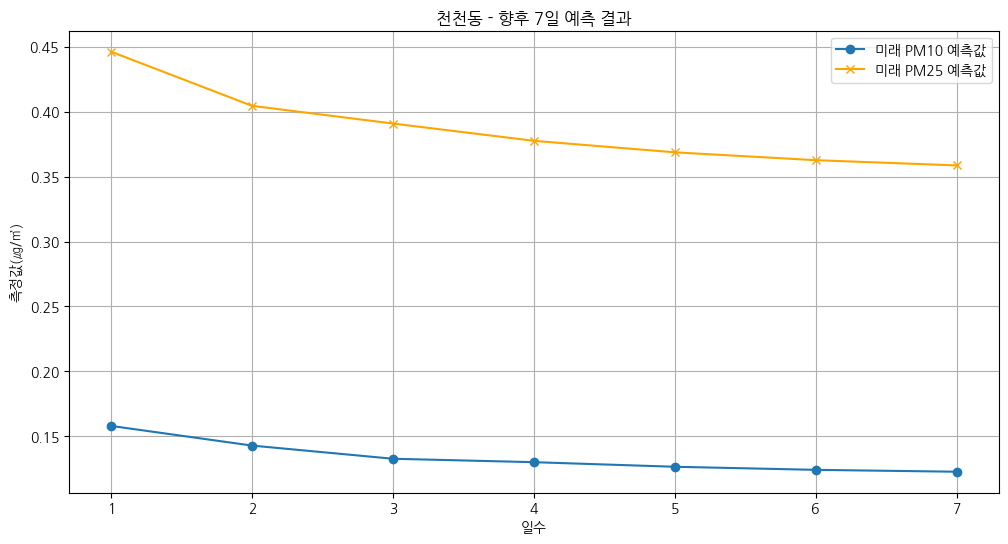

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


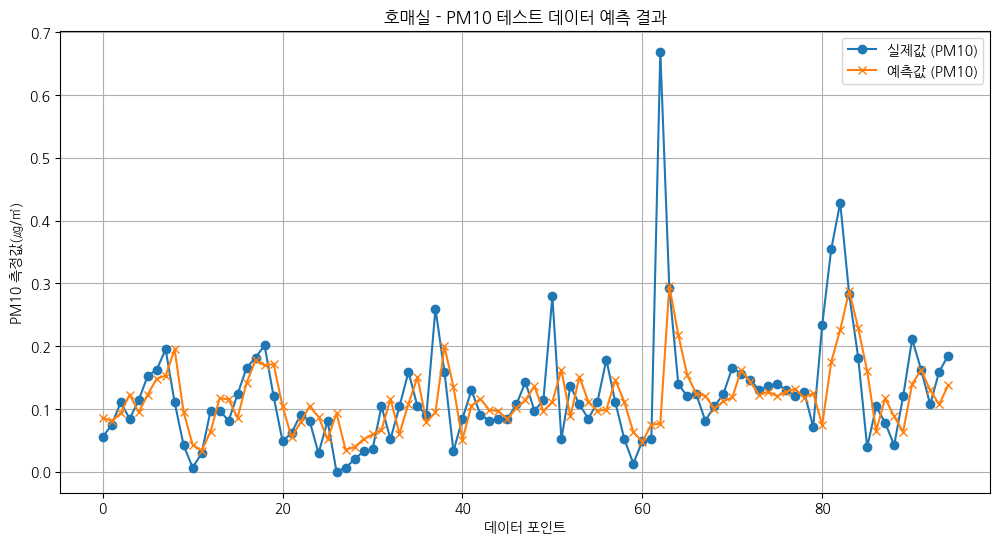

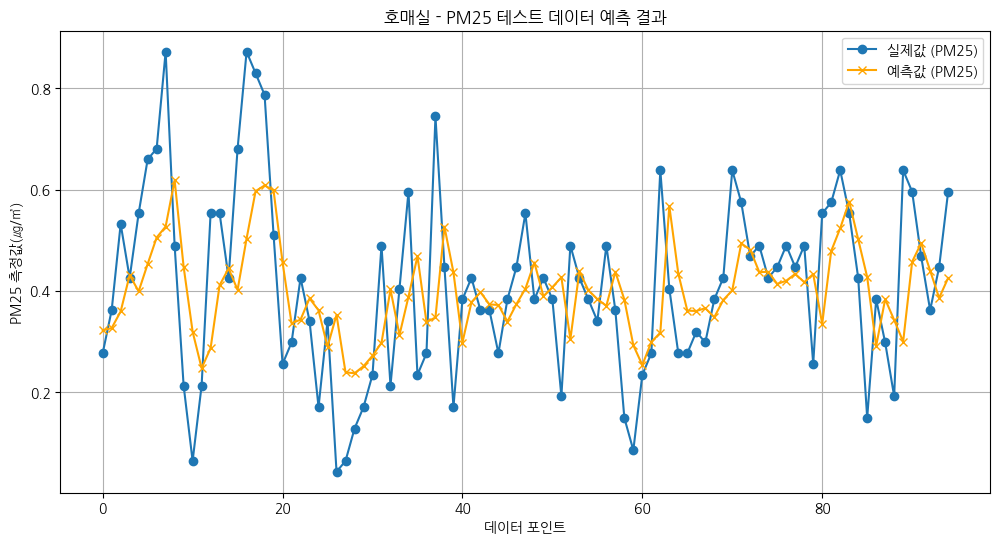

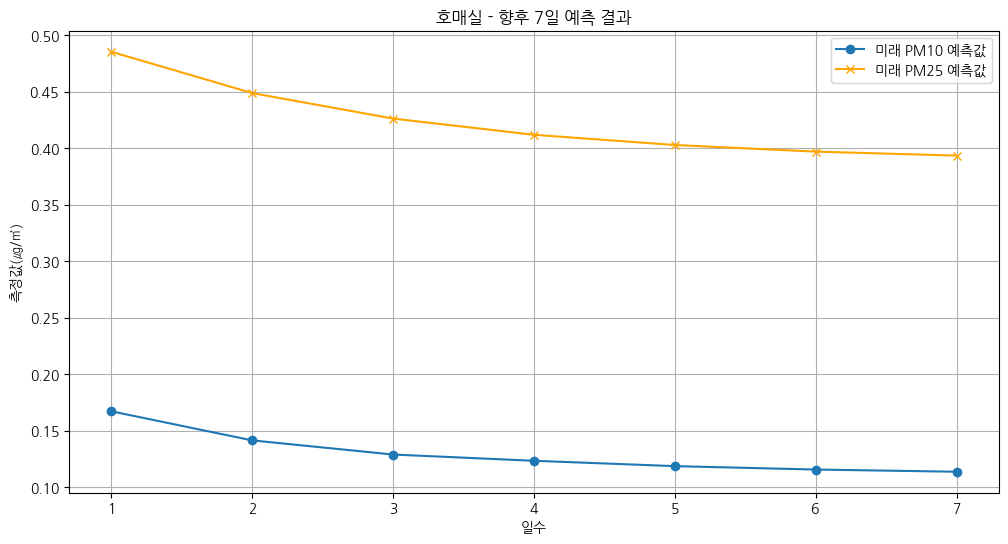

  측정장소명  PM10_RMSE  PM25_RMSE
0  경수대로   0.096902   0.215454
1   고색동   0.099089   0.193880
2   광교동   0.065047   0.216512
3   신풍동   0.101476   0.194318
4   영통동   0.099538   0.177422
5   인계동   0.091854   0.205858
6   천천동   0.097430   0.184094
7   호매실   0.083418   0.157446


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 미래 예측 함수
def predict_future(model, input_data, seq_length=3, days_to_predict=7):
    predictions = []
    current_data = input_data[-seq_length:]  # 마지막 시퀀스를 사용하여 예측 시작
    for _ in range(days_to_predict):
        prediction = model.predict(current_data[np.newaxis, :, :], verbose=0)
        predictions.append(prediction[0])  # PM10과 PM25 모두 저장
        current_data = np.vstack([current_data[1:], prediction])
    return np.array(predictions)

# 결과 저장용 리스트
results = []

# 각 측정 장소별로 데이터 처리 및 RMSE 계산
for location in suwon_data['측정장소명'].unique():
    # 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location].copy()
    location_data.set_index('측정일자', inplace=True)

    # 필요한 열만 선택
    dataset = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 데이터 정규화
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset_scaled = scaler.fit_transform(dataset)

    # 시계열 데이터 생성 함수
    def create_sequences(data, seq_length=3):
        X, y = [], []
        for i in range(seq_length, len(data)):
            X.append(data[i-seq_length:i])
            y.append(data[i])  # PM10과 PM25를 동시에 예측
        return np.array(X), np.array(y)

    seq_length = 3  # 과거 3일 데이터를 기반으로 예측
    X, y = create_sequences(dataset_scaled, seq_length)

    # 훈련 및 테스트 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # LSTM 모델 정의
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])))
    model.add(Dense(2))  # PM10과 PM25를 동시에 예측
    model.compile(optimizer='adam', loss='mse')

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # 예측
    y_pred = model.predict(X_test)

    # 역정규화
    y_test_rescaled = scaler.inverse_transform(y_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)

    # RMSE 계산 (PM10, PM25 각각)
    rmse_pm10 = np.sqrt(mean_squared_error(y_test_rescaled[:, 0], y_pred_rescaled[:, 0]))
    rmse_pm25 = np.sqrt(mean_squared_error(y_test_rescaled[:, 1], y_pred_rescaled[:, 1]))

    # 미래 7일 예측
    future_predictions = predict_future(model, dataset_scaled, seq_length=seq_length, days_to_predict=7)
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)

    # 결과 저장
    results.append({
        '측정장소명': location,
        'PM10_RMSE': rmse_pm10,
        'PM25_RMSE': rmse_pm25
    })

    # 시각화: 테스트 데이터 실제값 및 예측값 (PM10, PM25)
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled[:, 0], label='실제값 (PM10)', marker='o')
    plt.plot(y_pred_rescaled[:, 0], label='예측값 (PM10)', marker='x')
    plt.title(f'{location} - PM10 테스트 데이터 예측 결과')
    plt.xlabel('데이터 포인트')
    plt.ylabel('PM10 측정값(㎍/㎥)')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled[:, 1], label='실제값 (PM25)', marker='o')
    plt.plot(y_pred_rescaled[:, 1], label='예측값 (PM25)', marker='x', color='orange')
    plt.title(f'{location} - PM25 테스트 데이터 예측 결과')
    plt.xlabel('데이터 포인트')
    plt.ylabel('PM25 측정값(㎍/㎥)')
    plt.legend()
    plt.grid()
    plt.show()

    # 시각화: 미래 7일 예측 (PM10, PM25)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 8), future_predictions_rescaled[:, 0], marker='o', label='미래 PM10 예측값')
    plt.plot(range(1, 8), future_predictions_rescaled[:, 1], marker='x', label='미래 PM25 예측값', color='orange')
    plt.title(f'{location} - 향후 7일 예측 결과')
    plt.xlabel('일수')
    plt.ylabel('측정값(㎍/㎥)')
    plt.legend()
    plt.grid()
    plt.show()

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)
